<span style="font-family:Trebuchet MS; font-size:2em;">Project 3 | NB3: EDA</span>

Riley Robertson | Reddit Classification Project | Market Research: Sports Fans in the U.S. and England

# Imports and setup

In [1]:
# basics
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# date and time 
import datetime as dt
import time

# custom
import utilities.densmore as dns

## Module Preferences

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## Data Import

In [3]:
df = pd.read_csv('../data/2_clean/reddit_posts_clean.csv')

## Data Checks

In [4]:
# check
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12671 entries, 0 to 12670
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subreddit    12671 non-null  object
 1   target       12671 non-null  int64 
 2   author       12671 non-null  object
 3   score        12671 non-null  int64 
 4   comments     12671 non-null  int64 
 5   tag          12671 non-null  object
 6   index        12671 non-null  int64 
 7   created_utc  12671 non-null  int64 
 8   date         12671 non-null  object
 9   time         12671 non-null  object
 10  title        12669 non-null  object
 11  post         12555 non-null  object
 12  alltext      12671 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.3+ MB


## Removing Nulls

Somehow, my dataframe has nulls after importing, despite the lack of nulls prior to export in NB2. I suspect this has to do with changes in text encoding, but for the sake of time and because the number is small (44), I'll drop those rows and proceed with my analysis.

In [5]:
df.dropna(inplace=True)

## Converting 'created_utc' column to 'datetime'

So that I could later plot all of the posts by when they were created and also understand those times, I converted the 'created_utc' column to a datetime object using the datetime module.  

Despite the redundancy, the simple string fields for 'date' and 'time' can remain in the data frame in case either are needed for labeling the plots.

In [6]:
df['datetime'] = df['created_utc'].map(lambda x: dt.datetime.fromtimestamp(x))

# EDA

With the goal of understanding both communities for the sake of stronger marketing, it's important to dig into the comparison between them. I wanted to look at ways in which the subreddit posters were similar as well as the ways in which they differed. So one of the first things I did before diving in was to create DataFrames for each of the subreddits - that way, I'd be able to easily compare the two collections of posts.

In [7]:
df_epl = df[df['subreddit'] == 'epl'].copy()

In [8]:
df_nfl = df[df['subreddit'] == 'nfl'].copy()

In [9]:
type(df_epl)

pandas.core.frame.DataFrame

## Post Lengths

I created 'post_length' columns so that I could investigate trends in post length. Does one community tend to be more verbose than the other? A basic question, but was interested nonetheless to see if there was a surprising pattern.

In [10]:
df['post_length'] = df['post'].map(lambda x: len(x))
df_epl['post_length'] = df_epl['post'].map(lambda x: len(x))
df_nfl['post_length'] = df_nfl['post'].map(lambda x: len(x))

In [11]:
# df.head()
# df.info
# df['post_length'].value_counts(ascending=False)[:20]
# df[['title', 'post', 'post_length']].sort_values(by='post_length', ascending=False)[:20]

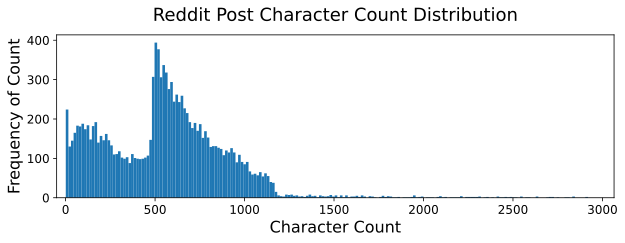

In [12]:
plt.figure(figsize = (10,3))

plt.hist(df['post_length'],bins=200)

plt.xlim(left=-50)
# plt.xlim(right=1500)

plt.title('Reddit Post Character Count Distribution', size = '18', pad = '14')

plt.xlabel('Character Count', size = 16)
plt.xticks(size = 12)

plt.ylabel('Frequency of Count', size = 16)
plt.yticks(size = 12);

The main thing to note on this plot is the obvious cutoff points of 500 and 1200 from the steps I took during my cleaning to reduce the number of posts from the NFL subreddit. In doing it this way, I effectively made it impossible to truly compare the lengths of posts from the two communities. we don't have all the data from r/nfl, making it impossible to truly understand it without going back to re-examine and adjust my cleaning process. 

**This is obviously not ideal in regards to the goals set out for me by OverArmor.** With more time, I'd return to the cleaning section again to either find a more suitable way of balancing my classes or create a separate dataset just for the purpose of looking at stringlengths and overall post counts between the two subreddits (regardless of any imbalance) to get a better sense for the nature of the raw data. 

## Post Creation Dates

Another Early 

### Both Subreddits Together

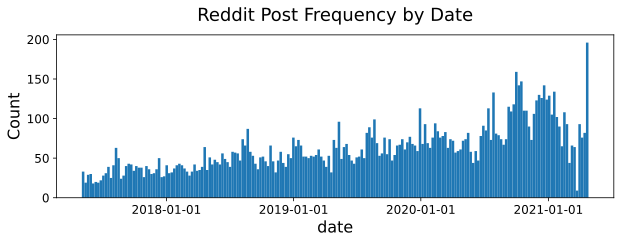

In [13]:
plt.figure(figsize = (10,3))

plt.hist(df['datetime'],bins=200)

plt.title('Reddit Post Frequency by Date', size = '18', pad = '14')

plt.xlabel('date', size = 16)
plt.xticks(ticks=['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], size = 12)

plt.ylabel('Count', size = 16)
plt.yticks(size = 12);

Combined, the NFL and EPL posts span a number of years - as far back as mid 2017. There's a gentle increase in post count over time, but for the most part, the changes aren't dramatic. Our spread of posts seems good, offering a wide sample of data.

In [14]:
df['subreddit'].value_counts()

nfl    7243
epl    5310
Name: subreddit, dtype: int64

### NFL

In [15]:
df_nfl.head(1)

,subreddit,target,author,score,comments,tag,index,created_utc,date,time,title,post,alltext,datetime,post_length
5426,nfl,1,BeersBikesBirds,1,50,none,2,1619268234,2021-04-24,05:43:54,Do teams draft players with the intent to trad...,Omitting players like Eli who specifically com...,Do teams draft players with the intent to trad...,2021-04-24 05:43:54,499


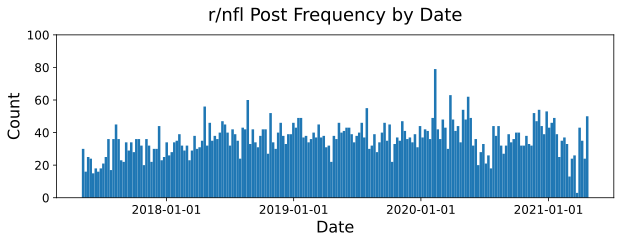

In [16]:
plt.figure(figsize = (10,3))

plt.hist(df_nfl['datetime'],bins=200)

plt.ylim(top=100)

plt.title('r/nfl Post Frequency by Date', size = '18', pad = '14')

plt.xlabel('Date', size = 16)
plt.xticks(ticks=['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], size = 12)

plt.ylabel('Count', size = 16)
plt.yticks(size = 12);

By itself, the NFL posts are very even across the timeline.  
The changes we saw in the graph above are likely from the EPL posts, which we can investigate next.

### EPL

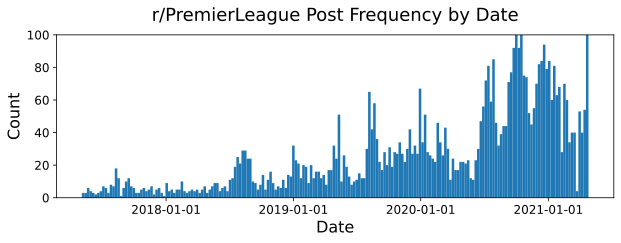

In [17]:
plt.figure(figsize = (10,3))

plt.hist(df_epl['datetime'],bins=200)

plt.ylim(top=100) 

plt.title('r/PremierLeague Post Frequency by Date', size = '18', pad = '14')

plt.xlabel('Date', size = 16)
plt.xticks(ticks=['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], size = 12)

plt.ylabel('Count', size = 16)
plt.yticks(size = 12);

As suspected, there is a far less consistency in post volume over time, quite possibly due to the kinds of posts I removed during the cleaning process. I limited the y axis on both charts to 60 for the sake of comparison. The least-represented data is EPL posts from 2017 through most of 2019. I don't think the lack of consistency will cause a problem in our analysis, but I can always come back and adjust my cleaning process to retain a larger number of posts from the PremierLeague subreddit.

## Most Common Words

### Both Subreddits Together

Finding information about the specific words used in each community was OverArmor's 3rd request after Data Collection and Modeling. So I jumped in and used count vectorizer to start my analysis and assembling materials to give to them.

In [18]:
cvec = CountVectorizer(stop_words='english')
word_counts = cvec.fit_transform(df['alltext'])

In [19]:
word_counts

<12553x40050 sparse matrix of type '<class 'numpy.int64'>'
	with 572764 stored elements in Compressed Sparse Row format>

In [20]:
counts_df = pd.DataFrame(word_counts.todense(), columns=cvec.get_feature_names())

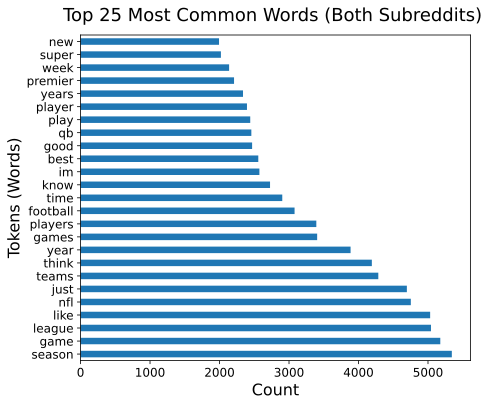

In [41]:
plt.figure(figsize = (7,6))
counts_df.sum().sort_values(ascending=False).head(26)[1:].plot(kind='barh');

plt.title('Top 25 Most Common Words (Both Subreddits) ', size = '18', pad = '14')

plt.xlabel('Count', size = 16)
plt.xticks(size = 12)

plt.ylabel('Tokens (Words)', size = 16)
plt.yticks(size = 12);

plt.savefig('../visualizations/top_25_words_cumulative.png', dpi=300, transparent=True, bbox_inches='tight')

The top words we see here are ones we might expect. They're words shared by both communities, even if they have different meanings or understandings based on context. There's still valuable information to be gained here, especially if we dig deeper beyond the top 25.

I'm going to export a DataFrame of the top 200 words from each subreddit that we can use for further analysis. 

In [22]:
# counts_df.sum().sort_values(ascending=False).head(26)

### NFL

For the first chart, I chose to look at count. But in order to compare the two subreddits, I decided to look at the mean value for each word, which gives us a normalized view of relative frequency, even between DataFrames whose charts would have different scales if plotted alone.

In [23]:
cvec_nfl = CountVectorizer(stop_words='english')
word_counts_nfl = cvec_nfl.fit_transform(df_nfl['alltext'])

counts_df_nfl = pd.DataFrame(word_counts_nfl.todense(), columns=cvec_nfl.get_feature_names())

In [24]:
# counts_df_nfl.sum().sort_values(ascending=False).head(26)

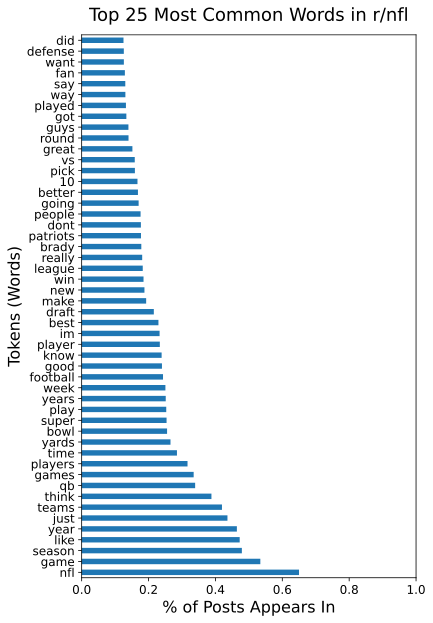

In [25]:
plt.figure(figsize = (6,10))
counts_df_nfl.mean().sort_values(ascending=False).head(51)[1:].plot(kind='barh');

plt.title('Top 25 Most Common Words in r/nfl', size = '18', pad = '14')

plt.xlim(right=1)

plt.xlabel('% of Posts Appears In', size = 16)
plt.xticks(size = 12)

plt.ylabel('Tokens (Words)', size = 16)
plt.yticks(size = 12);

Here we see the top 25 most common words by the percentage of posts in which they appear. I set this plot and the next one to the same scales so that we can evaluate them as such. The main thing I notice in comparing the two charts is that among the posts in our dataset, there seems to be a higher degree of word repetition in the NFL subreddit as compared to the EPL. 

Even when I expanded both charts to include the top 50 most common, the furthest down the list in the NFL chart were still in the 20% range, while the EPL tapers and declines very gradually in the 10% range.

### EPL

In [26]:
cvec_epl = CountVectorizer(stop_words='english')
word_counts_epl = cvec_epl.fit_transform(df_epl['alltext'])

counts_df_epl = pd.DataFrame(word_counts_epl.todense(), columns=cvec_epl.get_feature_names())

# counts_df_epl.sum().sort_values(ascending=False).head(26)

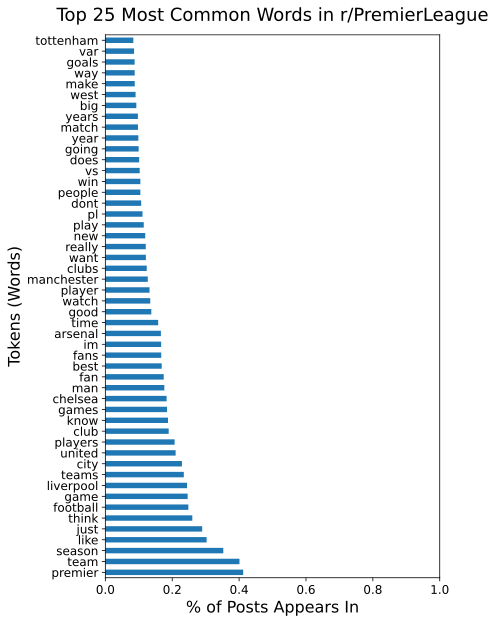

In [27]:
plt.figure(figsize = (6,10))
counts_df_epl.mean().sort_values(ascending=False).head(51)[1:].plot(kind='barh');

plt.title('Top 25 Most Common Words in r/PremierLeague', size = '18', pad = '14')

plt.xlim(right=1)

plt.xlabel('% of Posts Appears In', size = 16)
plt.xticks(size = 12)

plt.ylabel('Tokens (Words)', size = 16)
plt.yticks(size = 12);

### Collating and saving count and frequency data

Because we've narrowed down our words list to a small set, I concatenated dataframes with count and frequency data for the words from each dataframe and for both dataframes combined.

In [28]:
df_top200_count_all = pd.DataFrame(counts_df.sum().sort_values(ascending=False).head(201), columns=['count_all'])
df_top_200_freq_all = pd.DataFrame(counts_df.mean().sort_values(ascending=False).head(201), columns=['freq%_all'])

df_top200_count_nfl = pd.DataFrame(counts_df_nfl.sum().sort_values(ascending=False).head(201), columns=['count_nfl'])
df_top_200_freq_nfl = pd.DataFrame(counts_df_nfl.mean().sort_values(ascending=False).head(201), columns=['freq%_nfl'])

df_top200_count_epl = pd.DataFrame(counts_df_epl.sum().sort_values(ascending=False).head(201), columns=['count_epl'])
df_top_200_freq_epl = pd.DataFrame(counts_df_epl.mean().sort_values(ascending=False).head(201), columns=['freq%_epl'])


In [29]:
count_vec_vocab = pd.concat([df_top200_count_all, df_top_200_freq_all, 
                           df_top200_count_nfl, df_top_200_freq_nfl, 
                           df_top200_count_epl, df_top_200_freq_epl],
                          axis=1, verify_integrity=True, sort=True
                         )
count_vec_vocab

,count_all,freq%_all,count_nfl,freq%_nfl,count_epl,freq%_epl
10,1528.0,0.121724,1209.0,0.166920,319.0,0.060075
11,632.0,0.050347,465.0,0.064200,167.0,0.031450
12,611.0,0.048674,493.0,0.068066,NaN,NaN
15,619.0,0.049311,494.0,0.068204,NaN,NaN
16,NaN,NaN,474.0,0.065442,NaN,NaN
...,...,...,...,...,...,...
wr,643.0,0.051223,643.0,0.088775,NaN,NaN
wrong,NaN,NaN,NaN,NaN,160.0,0.030132
yards,1935.0,0.154146,1924.0,0.265636,NaN,NaN
year,3886.0,0.309567,3362.0,0.464172,524.0,0.098682


In [30]:
count_vec_vocab.sort_values(by='freq%_all', ascending=False, inplace=True)

In [31]:
count_vec_vocab.to_csv('../data/3_output/word_counts_and_frequencies.csv')

The exported CSV lists words in order of frequency in both subreddits together. The words that are unique to one subreddit or the other are listed alphabetically below the words that are found in both.

With more time, I could dive into these numbers even further, but as it is, I'll hand this off to OverArmor as part of the deliverable for their third request.

The other parts will come from looking at our model results.